<a href="https://colab.research.google.com/github/akeren/computer-vision/blob/main/PNEUMONIA_CNN_MODEL_CLASSIFICATION_FROM_CHEST_X_RAYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PNEUMONIA CLASSIFICIATION MODEL USING CHEST X-RAYS IMAGES

> Add blockquote



# Import Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Keras Version

In [ ]:
import keras

print(keras.__version__)

2.15.0


# Sklearn Version

In [ ]:
import sklearn

print(sklearn.__version__)

1.2.2


# Define the model with L2 regularization, increased dropout, and an additional Conv2D layer

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Increased dropout

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Increased dropout

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Increased dropout

model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))  # Additional Conv2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Increased dropout

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Enhanced data augmentation
*   Vertical flip
*   Rotation
*   Brightness Shift



In [ ]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    brightness_range=[0.8, 1.2])

# Define a Batch size

In [ ]:
batch_size = 64

# Training data set generation

In [ ]:
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/chest_xrays/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

Found 12229 images belonging to 2 classes.


# Validation data set generation

In [ ]:
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/chest_xrays/valid',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

Found 1165 images belonging to 2 classes.


# Testing data set generation

In [ ]:
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/chest_xrays/test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

Found 582 images belonging to 2 classes.


# Get the number of samples in the training, validation, and test sets

In [ ]:
num_train_samples = train_generator.samples
num_val_samples = validation_generator.samples
num_test_samples = test_generator.samples

# Calculate the steps per epoch for the training, validation, and test sets

In [ ]:
train_steps_per_epoch = num_train_samples // batch_size if num_train_samples % batch_size == 0 else num_train_samples // batch_size + 1

val_steps_per_epoch = num_val_samples // batch_size if num_val_samples % batch_size == 0 else num_val_samples // batch_size + 1

test_steps_per_epoch = num_test_samples // batch_size if num_test_samples % batch_size == 0 else num_test_samples // batch_size + 1

# Calculate class weights

In [ ]:
class_weights = compute_sample_weight(class_weight='balanced', y=train_generator.classes)
class_weights = dict(zip(np.unique(train_generator.classes), class_weights))

# Oversampling the minority class
- This was an improvement after the first iteration to resolve the issue of data set

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(np.array(train_generator.classes).reshape(-1, 1), train_generator.classes)
class_weights_resampled = compute_sample_weight(class_weight='balanced', y=y_resampled)
class_weights_resampled = dict(zip(np.unique(y_resampled), class_weights_resampled))

# Early stopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Learning rate reduction

In [ ]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.2, min_lr=0.001)

# Train the model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=val_steps_per_epoch,
    callbacks=[early_stopping, lr_reduction],
    class_weight=class_weights)

Epoch 1/10
192/192 [==============================] - 2663s 14s/step - loss: 1.8495 - accuracy: 0.7258 - val_loss: 0.6697 - val_accuracy: 0.7391 - lr: 0.0010
Epoch 2/10
192/192 [==============================] - 110s 575ms/step - loss: 1.1122 - accuracy: 0.7292 - val_loss: 0.6077 - val_accuracy: 0.7391 - lr: 0.0010
Epoch 3/10
192/192 [==============================] - 109s 566ms/step - loss: 1.0308 - accuracy: 0.7292 - val_loss: 0.6338 - val_accuracy: 0.7391 - lr: 0.0010
Epoch 4/10
192/192 [==============================] - 114s 591ms/step - loss: 0.9800 - accuracy: 0.7292 - val_loss: 0.5946 - val_accuracy: 0.7391 - lr: 0.0010
Epoch 5/10
192/192 [==============================] - 111s 579ms/step - loss: 0.9479 - accuracy: 0.7292 - val_loss: 0.4999 - val_accuracy: 0.7391 - lr: 0.0010
Epoch 6/10
192/192 [==============================] - 110s 574ms/step - loss: 0.9401 - accuracy: 0.7292 - val_loss: 0.4778 - val_accuracy: 0.7391 - lr: 0.0010
Epoch 7/10
192/192 [===========================

# Evaluate the model on the test set

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps_per_epoch)

10/10 [==============================] - 145s 16s/step - loss: 0.4653 - accuracy: 0.8763


# Print test loss and accuracy


In [ ]:
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Test loss: 0.4653142988681793
Test accuracy: 0.876288652420044


# Plot the loss and accuracy values over time

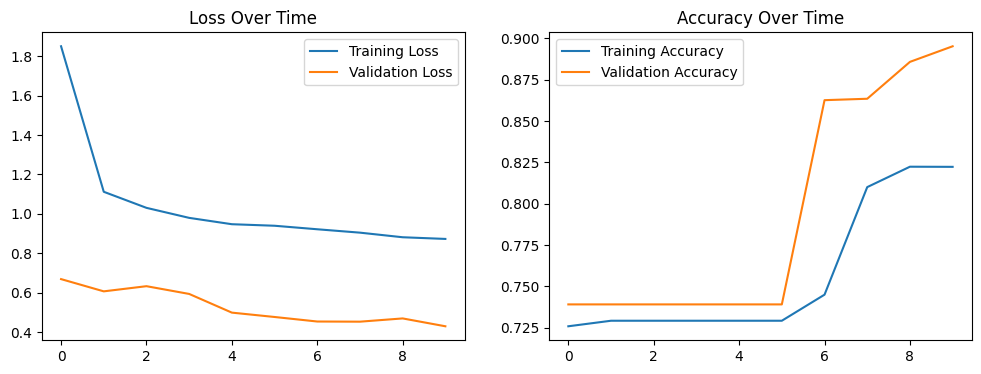

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.show()

# Print the test class Labels and indexes

In [ ]:
# Print class labels with their indexes
for label, index in test_generator.class_indices.items():
    print(f"Class label: {label}, Index: {index}")

Class label: NORMAL, Index: 0
Class label: PNEUMONIA, Index: 1


# Classification Report

In [ ]:
# Predict the classes
y_pred = model.predict(test_generator, steps=test_steps_per_epoch)

# Convert predictions to binary
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Get the true labels
y_true = test_generator.classes

# Calculate precision, recall, f1-score, and support
report = classification_report(y_true, y_pred_binary, output_dict=True)

#  Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

print(report_df)

10/10 [==============================] - 5s 471ms/step
              precision    recall  f1-score    support
0              0.344371  0.304094  0.322981  171.00000
1              0.723898  0.759124  0.741093  411.00000
accuracy       0.625430  0.625430  0.625430    0.62543
macro avg      0.534134  0.531609  0.532037  582.00000
weighted avg   0.612387  0.625430  0.618246  582.00000
